**Reference**

https://www.kaggle.com/code/shehabmagdy710/sequential-models-rnn-lstm-gru-98-accuracy


https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()   # Choose kaggle.json from your computer


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jasman98","key":"f74e5cede050297938007ea162bb4d41"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 975MB/s]


In [5]:
!unzip fake-and-real-news-dataset.zip

Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

df_true['Label'] = 1
df_fake['Label'] = 0

In [7]:
df_true.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
df_fake.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:
df = pd.concat([df_true, df_fake], ignore_index=True)
df.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


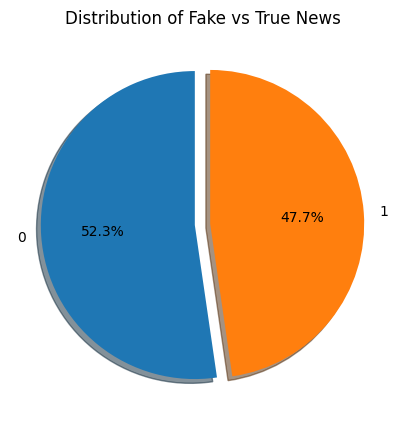

In [10]:
df['Label'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    explode=[0.05, 0.05],
    figsize=(5,5)
)

plt.title("Distribution of Fake vs True News")
plt.ylabel("")  # remove y-label
plt.show()

In [11]:
import re
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [12]:
def custom_standardization(text):
    text = tf.strings.lower(text)
    text = tf.strings.regex_replace(text, r"http\S+", "")
    text = tf.strings.regex_replace(text, r"[^a-z\s]", "")
    text = tf.strings.regex_replace(text, r"\s+", " ")
    return text

In [13]:
from sklearn.model_selection import train_test_split

X = df[['title','text']]
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
X_train.sample(5)

,title,text
35891,WATCH HILLARY CLINTON BARK Like A Dog During S...,Democrat presidential candidate Hillary Clinto...
26931,Dallas Police Chief Tells Congress To Shove T...,"It started out as an observation, then it turn..."
20340,Japan's Abe to launch $17-billion Indian bulle...,NEW DELHI/TOKYO (Reuters) - Japan s Prime Mini...
2391,Trump aims at insurers in battle over healthca...,WASHINGTON/NEW YORK (Reuters) - U.S. President...
2501,"Head of Senate panel says near deal on Russia,...",WASHINGTON (Reuters) - U.S. lawmakers are near...


In [15]:
X_test.sample(5)

,title,text
8364,Illinois governor urges 2018 vote on 'rigged' ...,CHICAGO (Reuters) - Illinois Republican Govern...
10661,Obama to meet Senate leaders over Supreme Cour...,WASHINGTON (Reuters) - President Barack Obama ...
36048,SUPREME COURT AGREES TO TAKE ON Obama’s Un-Ame...,"So far, the Supreme Court has not prevented on..."
13812,Honduran leader Hernandez declares himself vic...,TEGUCIGALPA (Reuters) - Honduran President Jua...
33124,BREAKING: WINNING! SENATE CONFIRMS Senator Jef...,"WITH A VOTE OF 52-47, SENATOR JEFF SESSIONS WA..."


In [16]:
#Cleaning data

X_train['title'] = X_train['title'].apply(custom_standardization)
X_train['text'] = X_train['text'].apply(custom_standardization)

X_test['title'] = X_test['title'].apply(custom_standardization)
X_test['text'] = X_test['text'].apply(custom_standardization)

X_train["Combined_Title_Text"] = X_train["title"] + " " + X_train["text"]
X_test["Combined_Title_Text"] = X_test["title"] + " " + X_test["text"]

In [17]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train["Combined_Title_Text"].astype(str).values, y_train))
train_ds = train_ds.shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((X_test["Combined_Title_Text"].astype(str).values, y_test))
val_ds = val_ds.shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)

In [18]:
MAX_VOCAB = 10000
SEQ_LENGTH = 200

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=MAX_VOCAB,
    output_mode='int',
    output_sequence_length=SEQ_LENGTH
)

In [19]:
vectorize_layer.adapt(train_ds.map(lambda text, label: text))

In [20]:
vectorize_layer.get_vocabulary()[:5]

['', '[UNK]', np.str_('the'), np.str_('to'), np.str_('of')]

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential([
    vectorize_layer,  # preprocessing inside the model
    Embedding(input_dim=MAX_VOCAB, output_dim=64, mask_zero=True),
    LSTM(64),
    Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [25]:
model.fit(train_ds,
          validation_data=val_ds,batch_size = 32,
          epochs=5)

Epoch 1/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 200s 178ms/step - accuracy: 0.8724 - loss: 0.3357 - val_accuracy: 0.9225 - val_loss: 0.2345
Epoch 2/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 188s 167ms/step - accuracy: 0.9174 - loss: 0.2410 - val_accuracy: 0.8879 - val_loss: 0.3593
Epoch 3/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 187s 167ms/step - accuracy: 0.9052 - loss: 0.2647 - val_accuracy: 0.9224 - val_loss: 0.2101
Epoch 4/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 187s 167ms/step - accuracy: 0.9586 - loss: 0.1258 - val_accuracy: 0.9619 - val_loss: 0.1086
Epoch 5/5
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 187s 167ms/step - accuracy: 0.9644 - loss: 0.1023 - val_accuracy: 0.9684 - val_loss: 0.1270


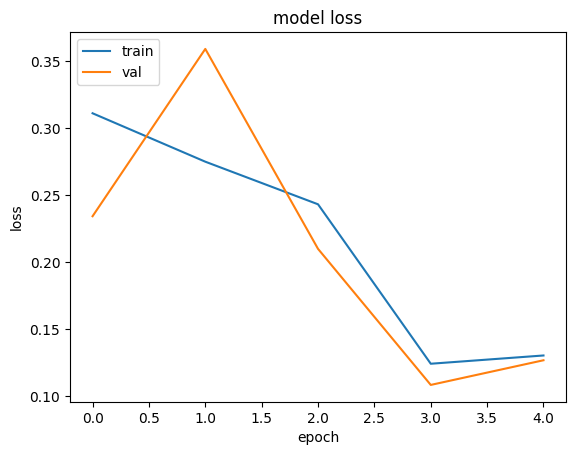

In [26]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [27]:
lstm_loss, lstm_accuracy = model.evaluate(val_ds)
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")


281/281 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.9684 - loss: 0.1260
LSTM Accuracy: 0.9684
